# 나랑 닮은 연예인은 누구?

## 목적
- 임베딩에 대해 이해하고 얼굴의 임베딩 벡터를 추출한다.
- 얼굴의 임베딩 벡터로 닮은 꼴인 얼굴을 찾는다.
- 나와 가까운 연예인 찾기

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import face_recognition
import numpy as np
from PIL import Image
%matplotlib inline
import tarfile

In [2]:
fname = os.getenv('HOME')+'/aiffel/AIFFEL_PROJECT/EXPLORATION_5/celebrity.tar.xz'  # 압축 파일을 지정해주고   
ap = tarfile.open(fname)      # 열어줍니다. 
ap.extractall('./celebrity')         # 그리고는 압축을 풀어줍니다. 
# () 안에는 풀고 싶은 경로를 넣어주면 되요. 비워둘 경우 현재 경로에 압축 풉니다. 
 
ap.close()  
                # 압축파일은 이제 닫아줍니다. 

## 1. 사진 모으기
- 내 사진 찍기
- 비교할 연예인 사진 모으기

In [3]:
##연예인 사진

dir_path = os.getenv('HOME')+'/aiffel/AIFFEL_PROJECT/EXPLORATION_5'
file_list = os.listdir(dir_path+'/celebrity')

print ("file_list: {}".format(file_list))

file_list: ['류승룡.jpeg', '박보검.jpg', '레드벨벳웬디.jpg', '지민(BTS).jpg', '트와이스나연.jpg', '이동국.jpeg', '정형돈.jpg', '슈가.jpg', '찬열.jpeg', '이효리.jpg', '존 파브르.jpeg', '온앤오프와이엇.jpg', '트와이스다현.jpeg', '신비.jpg', '차범근.jpeg', '윤아.jpg', '트와이스미나.jpg', '아놀드 슈워제네거.jpg', '제이콥 배털론.jpg', '마동석.jpeg', '효정.jpg', '지호.jpg', '김민재.jpeg', '최민식.jpg', '최무성.jpg', '김고은.jpeg', '택연.jpg', '류진.jpg', '박진영.jpg', '차명석.jpg', '씨잼.jpg', '드웨인 존슨.jpg', '지드래곤.jpeg', '이종석.jpeg', '박정민.jpg', '방시혁.jpeg', '이용진.jpg', '수호.jpg', '이명박.jpg', '조인성.jpg', '유아.jpg', '리아.jpg', '김광현.jpg', '지코.jpg', '이연걸.jpeg', '장원준.jpeg', '한기범.jpg', '정우성.jpeg', '슬리피.jpg', '도아.jpeg', '박명수.jpg', '정민철.jpg', '슬기.jpg', '박나래.jpeg', '안재홍.jpg', '저스틴 존슨.jpeg', '벤 에플렉.jpeg', '지수.jpg', '트와이스쯔위.jpg', '김윤석.jpeg', '강미나.jpg', '조승우.jpeg', '공유.jpg', '우기.jpg', '진.jpg', '심수창.jpeg', '아이즈원민주.jpg', '이제훈.jpeg', '뷔.png', '조이.jpg', '김상호.png', '숀 코네리.jpg', '이정재.jpeg', '이말년.png', '조원희.jpg', '개코.jpeg', '여자아이들수진.jpeg', '잇섭.png', '강동원.jpg', '이진호.jpeg', '봉준호.jpg', '윤경신.jpg', '이대형.jpg', '김C.jpeg', '슈퍼비.jpeg

file_list: ['경은_2.jpg', '경은_5.jpg', '경은_1.jpg', '경은_3.jpg']


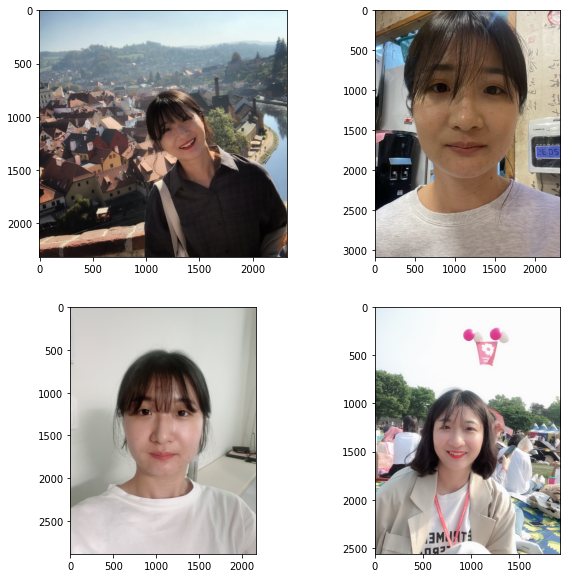

In [4]:
##내 사진

dir_path = os.getenv('HOME')+'/aiffel/AIFFEL_PROJECT/EXPLORATION_5'
file_list = os.listdir(dir_path +'/me')

print ("file_list: {}".format(file_list))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
    image = img.imread(dir_path+'/me/'+file_list[i])
    ax.imshow(image)
    
plt.show()

fig.tight_layout()

## 2. 얼굴 영역 자르기
임베딩 추출을 위해서는 얼굴 영역을 자른다.
- get_cropped_face(image_file) 통해서 잘라준다
- 자른 이미지는 PIL의 Image.fromarray를 통해서 PIL Image로 변환

In [5]:
def get_cropped_face(image_file):
    
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    
    if face_locations == []:
        return []
    
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

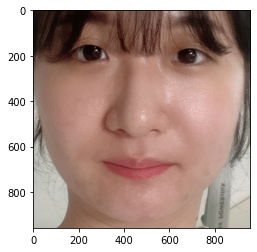

In [6]:
me_dir_path = os.getenv('HOME')+'/aiffel/AIFFEL_PROJECT/EXPLORATION_5/me/경은_1.jpg'
#me_file_list = os.listdir(me_dir_path)
#face=get_cropped_face(me_dir_path)
me_cropped_face = get_cropped_face(me_dir_path)
plt.imshow(me_cropped_face)

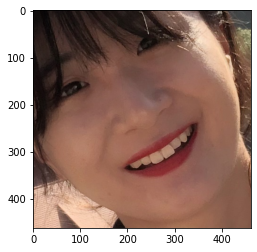

In [7]:
me_dir_path = os.getenv('HOME')+'/aiffel/AIFFEL_PROJECT/EXPLORATION_5/me/경은_2.jpg'
me_cropped_face = get_cropped_face(me_dir_path)
plt.imshow(me_cropped_face)

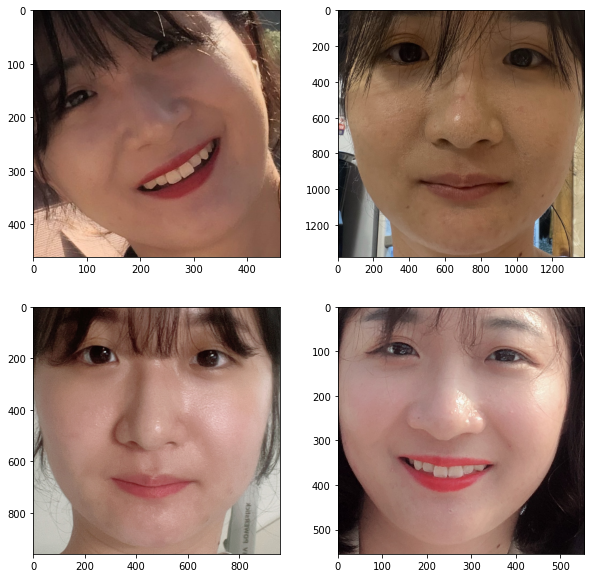

In [8]:
#얼굴 이미지만 잘라오는 함수
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a,b,c,d=face_locations[0]
    cropped_face=image[a:c,d:b,:]
    
    return cropped_face

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

for i, ax in enumerate(axes.flatten()):
    cropped_face = get_cropped_face(dir_path+'/me/'+file_list[i])
    ax.imshow(cropped_face) 
    #cropped_face를 PIL 이미지로 변환하여 저장하기
    pillow_image = Image.fromarray(cropped_face) 
    
    pillow_image.save(dir_path+'/cropped_face/'+file_list[i])    
    

## 3. 얼굴 영역의 임베딩 추출하기
- def get_face_embedding(face) : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수
- def get_face_embedding_dict(dir_path) : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수

In [9]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(me_cropped_face)  
embedding

[array([-9.78837013e-02,  1.22750305e-01,  2.97702588e-02, -6.33856058e-02,
        -1.10901974e-01, -6.13807328e-02, -9.50934887e-02, -1.18825756e-01,
         1.23294756e-01, -1.48277834e-01,  2.30986923e-01, -1.08307600e-01,
        -2.08294466e-01, -3.03008668e-02, -6.06947094e-02,  2.24703103e-01,
        -2.50578314e-01, -1.25642046e-01, -6.43886775e-02, -6.38330588e-03,
         5.17662577e-02,  5.84788620e-02, -1.81453116e-03,  7.70452805e-03,
        -1.70892984e-01, -3.47496688e-01, -4.77308407e-02, -6.69665635e-02,
        -9.14030615e-03, -3.05896308e-02, -6.03663474e-02,  2.60825139e-02,
        -1.37878984e-01, -4.01748195e-02,  1.22532077e-01,  1.36956900e-01,
        -1.31451059e-04, -6.87955990e-02,  1.59277141e-01,  9.66687128e-03,
        -2.98456788e-01,  3.48048843e-02,  1.30342513e-01,  2.60508597e-01,
         1.91105828e-01,  8.62423237e-03, -2.24496052e-03, -2.17963830e-01,
         1.78611442e-01, -1.98453695e-01, -1.74769536e-02,  1.07805811e-01,
         5.1

In [10]:
#images 디렉토리 안에 있는 모든 이미지 파일의 임베딩을 구해서 dict 구조에 담아 리턴하는 함수 만들기

def get_face_embedding_dict(dir_path):
    embedding_dict = {} # 임베딩 딕셔너리
    cropped_dict = {} # 사진 딕셔너리
    
    for file in file_list:
        try:
            img_path = os.path.join(dir_path, file) # 기준경로+파일명
            face = get_cropped_face(img_path) # 얼굴 잘라낸 사진
            embedding = get_face_embedding(face) 
            if len(embedding) > 0: 
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
                embedding_dict[os.path.splitext(file)[0]] = embedding[0] # 임베딩 딕셔너리에 담기
                cropped_dict[os.path.splitext(file)[0]] = face # 사진 딕셔너리에 사진 담기
        except:
            pass
    return embedding_dict, cropped_dict

embedding_dict, cropped_dict = get_face_embedding_dict(dir_path+'/me/') # 기준경로
#embedding_dict['경은_1']

In [11]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [12]:
get_distance('경은_2','경은_1')  #나로 비교

0.406219016312156

In [13]:
def get_nearest_face(name, top=5): 
    pass

In [14]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1
  
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [15]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [16]:
get_nearest_face('경은_1', 3) 

순위 1 : 이름(경은_5), 거리(0.2653879110977704)
순위 2 : 이름(경은_3), 거리(0.32421872004449326)
순위 3 : 이름(경은_2), 거리(0.406219016312156)


## 4. 연예인들과 비교하기
- get_nearest_face(name, top=5) 사용해서 비교하기

In [17]:
dir_path = os.getenv('HOME')+'/aiffel/AIFFEL_PROJECT/EXPLORATION_5'
file_list = os.listdir(dir_path+'/celebrity')

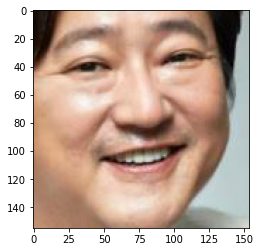

In [18]:
ce_dir_path = os.getenv('HOME')+'/aiffel/AIFFEL_PROJECT/EXPLORATION_5/celebrity/곽도원.jpg'
#me_file_list = os.listdir(me_dir_path)
#face=get_cropped_face(me_dir_path)
ce_cropped_face = get_cropped_face(ce_dir_path)
plt.imshow(ce_cropped_face)

In [19]:
#얼굴 이미지만 잘라오는 함수

for i, file in enumerate(file_list):
    try:
        cropped_face = get_cropped_face(dir_path+'/celebrity/'+file)
        pillow_image = Image.fromarray(cropped_face)  #cropped_face를 PIL 이미지로 변환하여 저장하기
    
        pillow_image.save(dir_path+'/cropped_face_celebrity/'+file) 
    except :
        pass

In [20]:
embedding_dict, cropped_dict = get_face_embedding_dict(dir_path+'/cropped_face_celebrity/') # 기준경로

In [21]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [22]:
def get_nearest_face(name, top=5): 
    pass

In [23]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1
  
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [24]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [25]:
get_nearest_face('경은_1', 5) 

순위 1 : 이름(강미나), 거리(0.37227832048370857)
순위 2 : 이름(채연), 거리(0.37941386083601186)
순위 3 : 이름(비니), 거리(0.39495004126686367)
순위 4 : 이름(윤아), 거리(0.3962476449347076)
순위 5 : 이름(나인뮤지스경리), 거리(0.4000349605363431)
